In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Load the dataset
df = pd.read_csv('Resources/data-scientist-task-data-2017-08-16.csv')

In [3]:
# Let's look at the columns
df.columns

Index([u'validAlertedResponses', u'age', u'gender', u'avg_happy',
       u'avg_energised', u'avg_focused', u'avg_stressed', u'avg_productive1h',
       u'avg_AC_10i', u'avg_AC_2i', u'avg_AC_5i', u'avg_BP_11i', u'avg_BP_13i',
       u'avg_BP_1i', u'avg_BP_9i', u'avg_EC_2i', u'avg_EC_5i', u'avg_GS_11i',
       u'avg_KP_10i', u'avg_SR_7m', u'avg_SU_3i', u'avg_SU_6i', u'avg_TL_10i',
       u'avg_TL_14i', u'avg_TL_6i', u'avg_TS_14i', u'avg_TS_1i', u'avg_AC_9m',
       u'avg_BP_4m', u'avg_EC_9m', u'avg_GS_12m', u'avg_GS_4m', u'avg_GS_7m',
       u'avg_KP_13m', u'avg_KP_3m', u'avg_KP_6m', u'avg_SR_12m', u'avg_SR_13m',
       u'avg_SR_14m', u'avg_SR_8m', u'avg_SU_12m', u'avg_SU_14m',
       u'avg_SU_16m', u'avg_TL_13m', u'avg_TL_16m', u'avg_TS_13m',
       u'avg_TS_16m', u'avg_TS_4m', u'avg_TS_8m', u'avg_AC_12t', u'avg_AC_4t',
       u'avg_AC_7t', u'avg_BP_5t', u'avg_GS_15t', u'avg_GS_5t', u'avg_GS_9m',
       u'avg_KP_4t', u'avg_KP_7t', u'avg_SU_15t', u'avg_TL_17t', u'avg_TL_1t',
       u'avg

In [4]:
# Look at the first few rows of the dataset
df.head(3)

,validAlertedResponses,age,gender,avg_happy,avg_energised,avg_focused,avg_stressed,avg_productive1h,avg_AC_10i,avg_AC_2i,...,avg_RC_1,avg_RC_2,avg_RC_3,avg_SA_1,avg_SA_2,avg_SA_3,avg_SA_4,avg_SA_5,avg_SA_6,avg_SA_7
0,64,45-54,male,0.453063,0.486969,0.588578,0.555593,0.615677,0.812500,0.666667,...,0.9375,1.000,NaN,0.583333,0.416667,0.666667,0.250,0.833333,0.5,0.75
1,59,35-44,female,0.635610,0.533881,0.629915,0.118125,0.637674,0.666667,0.625000,...,0.7500,0.875,0.75,0.500000,0.666667,0.666667,0.625,0.500000,0.5,0.75
2,45,45-54,female,0.677800,0.681400,0.659178,0.454545,0.782000,0.875000,1.000000,...,0.5000,1.000,0.50,NaN,NaN,0.750000,0.500,0.750000,0.5,1.00


From the brief we are looking for the relationship between average happiness and the 14 trait components.

As such I will discount the age, gender, and other psychological state outcome variables. However I will look at age and gender briefly to gain a better understanding of how they affect happiness. 

It might be insightful to include these in future analysis.

In [5]:
# Display the number of respondents in each age group
df.age.value_counts()

35-44          480
45-54          433
25-34          422
16-24           87
55+             49
>55             47
unspecified     14
Name: age, dtype: int64

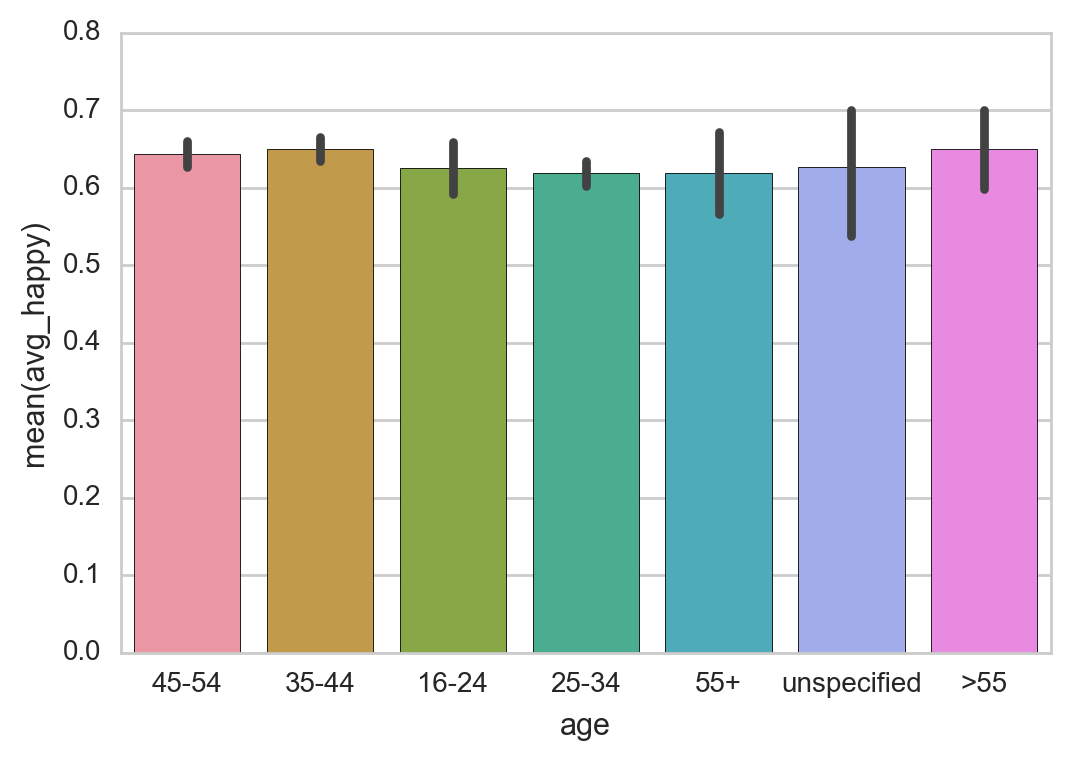

In [6]:
# Plot a barchart of the age vs average happiness
sns.barplot(df.age, df.avg_happy)
plt.show()

We can see that happiness is very similar across all age groups with those ages >55 coming out the happiest.

In [7]:
# Display the number of respondents in each gender group
df.gender.value_counts()

male           796
female         722
unspecified     12
transgender      2
Name: gender, dtype: int64

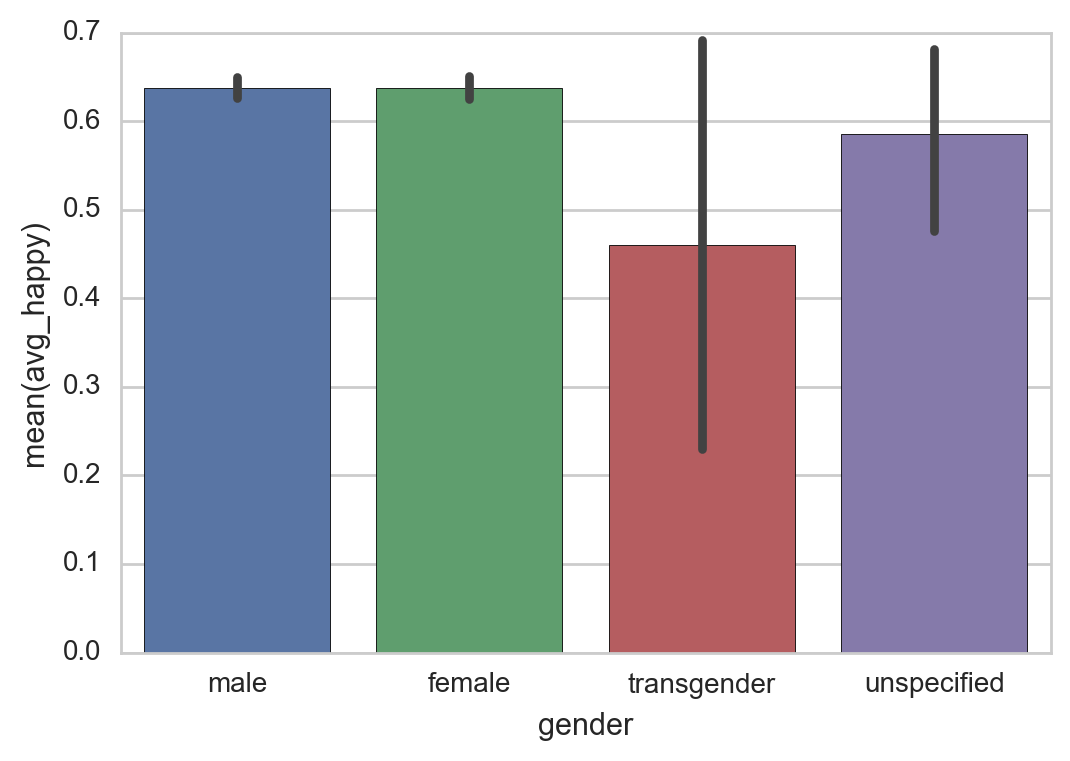

In [8]:
# Plot a barchart of the gender vs average happiness
sns.barplot(df.gender, df.avg_happy)
plt.show()

Here we can see that males and females share an almost identical lever of happiness. This is followed by participants who didn't specify a gender although we can see that their responses were much more varied.

Finally we can see that the participants identidied as transgender had the lowest average happiness. From the value counts we can see that only two participants identified as transgender and there average happiness values accounted for the highest and lowest. This would be interesting to analyse further to understand what factors are affecting their happiness.

In [9]:
df = df.drop(['age', 'gender', 'avg_energised', 'avg_focused', 'avg_stressed', 
              'avg_productive1h'], axis=1)

Now let's look at the dataframe in more detail.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 82 columns):
validAlertedResponses    1533 non-null int64
avg_happy                1533 non-null float64
avg_AC_10i               820 non-null float64
avg_AC_2i                846 non-null float64
avg_AC_5i                808 non-null float64
avg_BP_11i               836 non-null float64
avg_BP_13i               808 non-null float64
avg_BP_1i                823 non-null float64
avg_BP_9i                829 non-null float64
avg_EC_2i                810 non-null float64
avg_EC_5i                830 non-null float64
avg_GS_11i               830 non-null float64
avg_KP_10i               827 non-null float64
avg_SR_7m                845 non-null float64
avg_SU_3i                858 non-null float64
avg_SU_6i                821 non-null float64
avg_TL_10i               826 non-null float64
avg_TL_14i               827 non-null float64
avg_TL_6i                814 non-null float64
avg_TS_14i         

We can see that there are no missing values in the validAlertedResponses and avg_happy columns but there are numerous missing values in the remaining columns.

For the purpose of this analysis I will assume that these were unanswered questions so I will replace them with zero.

In [11]:
# Fill in the NaN values with zeros
df.fillna(0, inplace=True)

In [12]:
df.head(3)

,validAlertedResponses,avg_happy,avg_AC_10i,avg_AC_2i,avg_AC_5i,avg_BP_11i,avg_BP_13i,avg_BP_1i,avg_BP_9i,avg_EC_2i,...,avg_RC_1,avg_RC_2,avg_RC_3,avg_SA_1,avg_SA_2,avg_SA_3,avg_SA_4,avg_SA_5,avg_SA_6,avg_SA_7
0,64,0.453063,0.812500,0.666667,0.750,0.750000,0.50,0.50,0.0,0.875,...,0.9375,1.000,0.00,0.583333,0.416667,0.666667,0.250,0.833333,0.5,0.75
1,59,0.635610,0.666667,0.625000,0.625,0.583333,0.00,0.75,0.5,0.750,...,0.7500,0.875,0.75,0.500000,0.666667,0.666667,0.625,0.500000,0.5,0.75
2,45,0.677800,0.875000,1.000000,0.750,1.000000,0.75,0.00,1.0,1.000,...,0.5000,1.000,0.50,0.000000,0.000000,0.750000,0.500,0.750000,0.5,1.00


All NaN values have been successfully replaces with zeros.

Next I'll look at the avg_happy values in more detail.

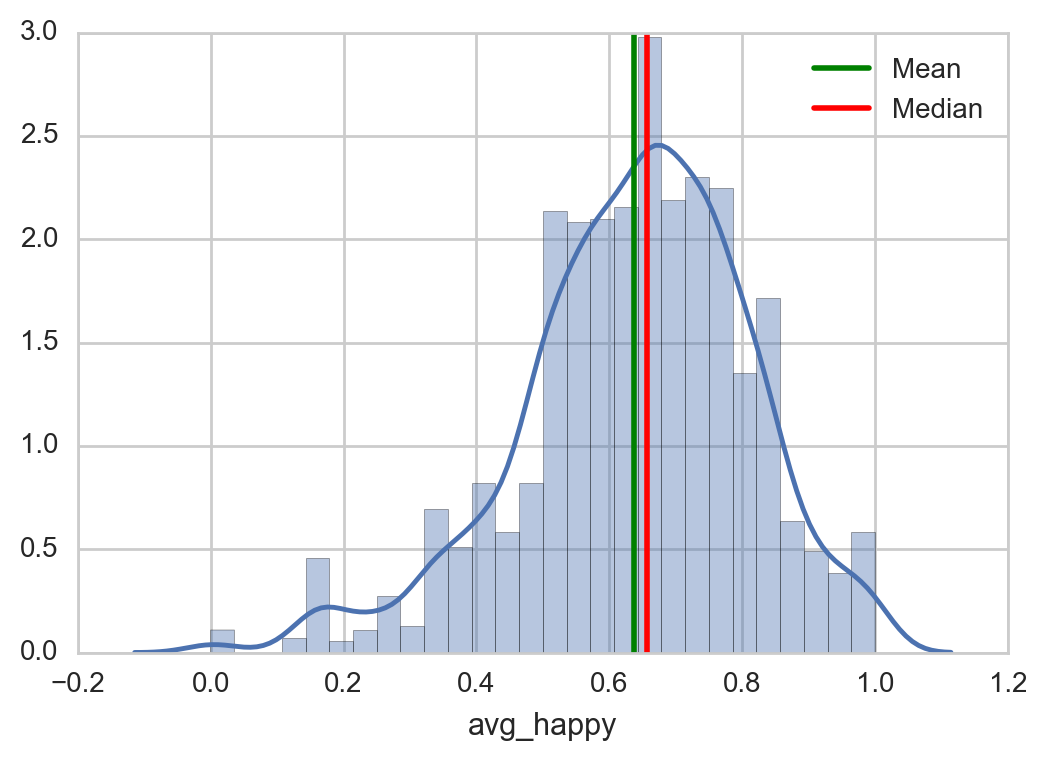

In [13]:
# Plot the distribution of avg_happy
ax = sns.distplot(df.avg_happy)
ax.axvline(df.avg_happy.mean(), color = 'green', linewidth = 2)
ax.axvline(df.avg_happy.median(), color = 'red', linewidth = 2)
ax.legend(['Mean', 'Median'])
plt.show()

This is very close to a normal distribution so I will not need to do anything further. We can see that the average happiness rating is 0.637.

Next I will look at the validAlertedResponses.

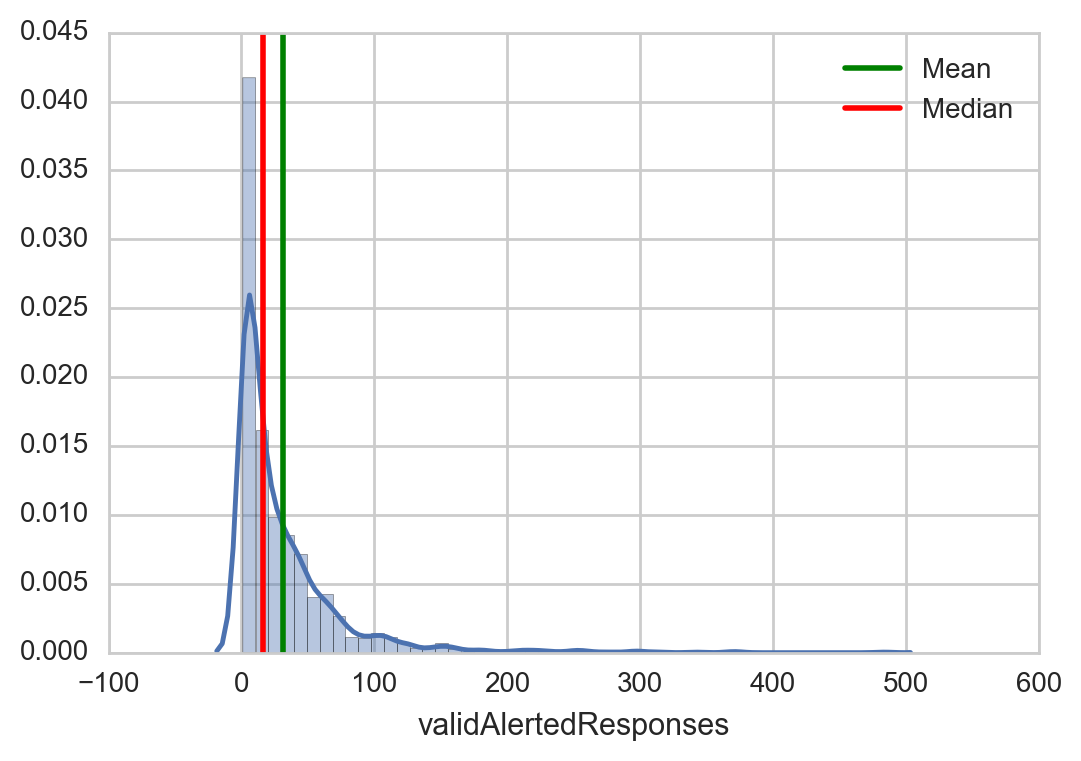

In [14]:
# Plot the distribution of validAlertedResponses
ax = sns.distplot(df.validAlertedResponses)
ax.axvline(df.validAlertedResponses.mean(), color = 'green', linewidth = 2)
ax.axvline(df.validAlertedResponses.median(), color = 'red', linewidth = 2)
ax.legend(['Mean', 'Median'])
plt.show()

The distribution of responses it right skewed meaning that the majority of respondents  provided fewer responses. The average number of responses is ~21.

For this analysis I will remove rows with less than 5 responses.

In [15]:
# Delete the rows with validAlertedResponses < 5
df = df[df['validAlertedResponses'] > 5]

This has removed 404 respondants from the dataframe

I now need to aggregate the remaining 80 columns into 14 trait components. 

- I am assuming the trait components are on the Likert scale. They are in a range of different lengths - 3, 5, 6, 7 & 8.

- Each component column has a number in its description. I will assume that this is the weighting for that part of the component response.

- The averages do not give an indication of the the number of responses each question has recieved. I will assume the proportions of component questions answered is the average for that question over the sum of the all the averages for that component. 

- I will work out the overall scoring for each component by summing up the product of the weighting and the question proportion.



In [16]:
# List the components
components = ['avg_AC', 'avg_BA', 'avg_BP', 'avg_CE', 'avg_EC', 'avg_EE', 
             'avg_GS', 'avg_KP', 'avg_RC', 'avg_SA', 'avg_SR', 'avg_SU', 
             'avg_TL', 'avg_TS']

In [17]:
# Create a new dataframe for storing the new features
final = df.avg_happy.to_frame()

In [18]:
# Loop through the 14 components
for i in components:
    #Filter to all the columns associated with the component and calculate the sum
    cols = df.filter(like=i)
    cols['Sum'] = cols.sum(axis=1)
    # Divide each part of the component by the sum
    cols = (cols.T/cols.Sum.T).T
    cols.drop('Sum', axis=1, inplace=True)
    # Multiply by the number of overall responses to determine reponses per question
    cols = (cols.T*df.validAlertedResponses.T).T
    # Loop through questions in each component
    for x in cols:
        # Extract number(weighting) from column title and multiply with values in column
        multiple = int(''.join(ele for ele in x if ele.isdigit()))
        cols.loc[:, x] = cols[x] * multiple
    # Calculate the sum of the columns again and add to final dataframe
    cols['Sum'] = cols.sum(axis=1)
    final[i] = cols.sum(axis=1)
# Finally divide the components by the number of responses per row
final[components] = (final[components].T/df.validAlertedResponses.T).T    

In [19]:
# Let's look at the first few rows
final.head(3)

,avg_happy,avg_AC,avg_BA,avg_BP,avg_CE,avg_EC,avg_EE,avg_GS,avg_KP,avg_RC,avg_SA,avg_SR,avg_SU,avg_TL,avg_TS
0,0.453063,14.242678,6.108108,14.176471,4.000000,10.375000,8.904665,18.385650,15.066667,3.032258,8.416667,21.500000,21.515152,24.738916,18.270042
1,0.635610,15.182796,6.480000,11.100000,4.076923,10.408163,9.217391,16.483871,14.444444,4.000000,8.118812,21.695652,21.586592,21.694915,16.264151
2,0.677800,11.562500,4.533333,18.400000,3.866667,6.571429,9.909091,25.142857,13.800000,4.000000,10.285714,21.857143,22.285714,22.400000,17.478261


In [20]:
final.describe()

,avg_happy,avg_AC,avg_BA,avg_BP,avg_CE,avg_EC,avg_EE,avg_GS,avg_KP,avg_RC,avg_SA,avg_SR,avg_SU,avg_TL,avg_TS
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,0.659609,13.301832,5.991081,13.798830,3.682688,9.249751,9.055970,17.226462,13.883035,3.533631,7.814058,20.496366,20.229710,20.861776,17.419911
std,0.149531,3.776903,2.068133,4.478449,1.483473,4.540167,2.462320,4.470328,4.241575,1.529794,2.167385,5.404923,5.947794,5.760062,5.416432
min,0.116700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.568647,12.648649,5.750000,12.769231,3.750000,7.000000,8.600000,16.480000,13.000000,3.333333,7.400000,20.206897,19.076923,19.744334,16.105263
50%,0.666714,13.938462,6.390244,14.235294,4.000000,10.206897,9.333333,17.790210,14.428571,3.942857,8.000000,21.500000,21.117647,21.446809,17.938931
75%,0.759111,14.697674,7.000000,15.384615,4.250000,11.000000,10.080000,18.875000,15.571429,4.017429,8.545455,22.615385,22.461538,22.893617,19.454545
max,1.000000,24.000000,10.000000,26.000000,6.000000,18.000000,16.000000,30.000000,26.000000,6.000000,14.000000,28.000000,32.000000,34.000000,32.000000


From the statistics above we can see that there that all of the component questions have 0 values. This means that respondants did not answer these component questions.

To have a better understanding of how all the components contribute to hapiness I will remove rows where questions have not been answered. First I will check for any missing data.

In [21]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 0 to 1530
Data columns (total 15 columns):
avg_happy    1129 non-null float64
avg_AC       1129 non-null float64
avg_BA       1129 non-null float64
avg_BP       1129 non-null float64
avg_CE       1129 non-null float64
avg_EC       1129 non-null float64
avg_EE       1129 non-null float64
avg_GS       1129 non-null float64
avg_KP       1129 non-null float64
avg_RC       1129 non-null float64
avg_SA       1129 non-null float64
avg_SR       1129 non-null float64
avg_SU       1129 non-null float64
avg_TL       1129 non-null float64
avg_TS       1129 non-null float64
dtypes: float64(15)
memory usage: 141.1 KB


There are no null values in the data set.

In [22]:
# Remove rows where one or more component questions were left blank
final = final[(final != 0).all(1)]
# Reset the index
final.reset_index(drop=True, inplace=True)

Next let's see if there are any strong correlations between the components.

In [23]:
# Correlation matrix
corrmat = final.corr()
corrmat

,avg_happy,avg_AC,avg_BA,avg_BP,avg_CE,avg_EC,avg_EE,avg_GS,avg_KP,avg_RC,avg_SA,avg_SR,avg_SU,avg_TL,avg_TS
avg_happy,1.000000,-0.031407,-0.098987,0.043736,-0.036659,0.025040,-0.033162,-0.042099,-0.012833,-0.000346,-0.031702,-0.011715,0.004226,0.002336,-0.033128
avg_AC,-0.031407,1.000000,-0.037446,-0.101104,0.001997,0.017620,0.067843,0.024769,-0.040281,-0.032615,-0.008629,0.055602,0.002833,0.010530,-0.073712
avg_BA,-0.098987,-0.037446,1.000000,-0.043652,0.031363,-0.108539,0.064407,0.079061,-0.033049,-0.027802,-0.020743,-0.025624,-0.087187,-0.063327,0.026367
avg_BP,0.043736,-0.101104,-0.043652,1.000000,0.006228,-0.140934,-0.012848,-0.043520,0.050752,-0.006208,0.014298,0.096687,-0.001663,-0.004790,-0.025855
avg_CE,-0.036659,0.001997,0.031363,0.006228,1.000000,-0.051928,0.025394,0.080544,-0.074414,-0.024370,-0.026558,0.054670,-0.027238,0.020421,-0.039370
avg_EC,0.025040,0.017620,-0.108539,-0.140934,-0.051928,1.000000,-0.115297,0.011932,0.098832,-0.009290,-0.090842,-0.103217,-0.055823,-0.040124,0.090020
avg_EE,-0.033162,0.067843,0.064407,-0.012848,0.025394,-0.115297,1.000000,0.094528,-0.008479,-0.032196,0.089249,-0.029943,0.127839,-0.026193,0.047913
avg_GS,-0.042099,0.024769,0.079061,-0.043520,0.080544,0.011932,0.094528,1.000000,0.037378,-0.087450,-0.023932,-0.115813,-0.046788,-0.009111,-0.089290
avg_KP,-0.012833,-0.040281,-0.033049,0.050752,-0.074414,0.098832,-0.008479,0.037378,1.000000,-0.039177,-0.066116,-0.099397,-0.069920,0.037160,0.033728
avg_RC,-0.000346,-0.032615,-0.027802,-0.006208,-0.024370,-0.009290,-0.032196,-0.087450,-0.039177,1.000000,-0.031808,0.018789,-0.039745,0.082635,0.072398


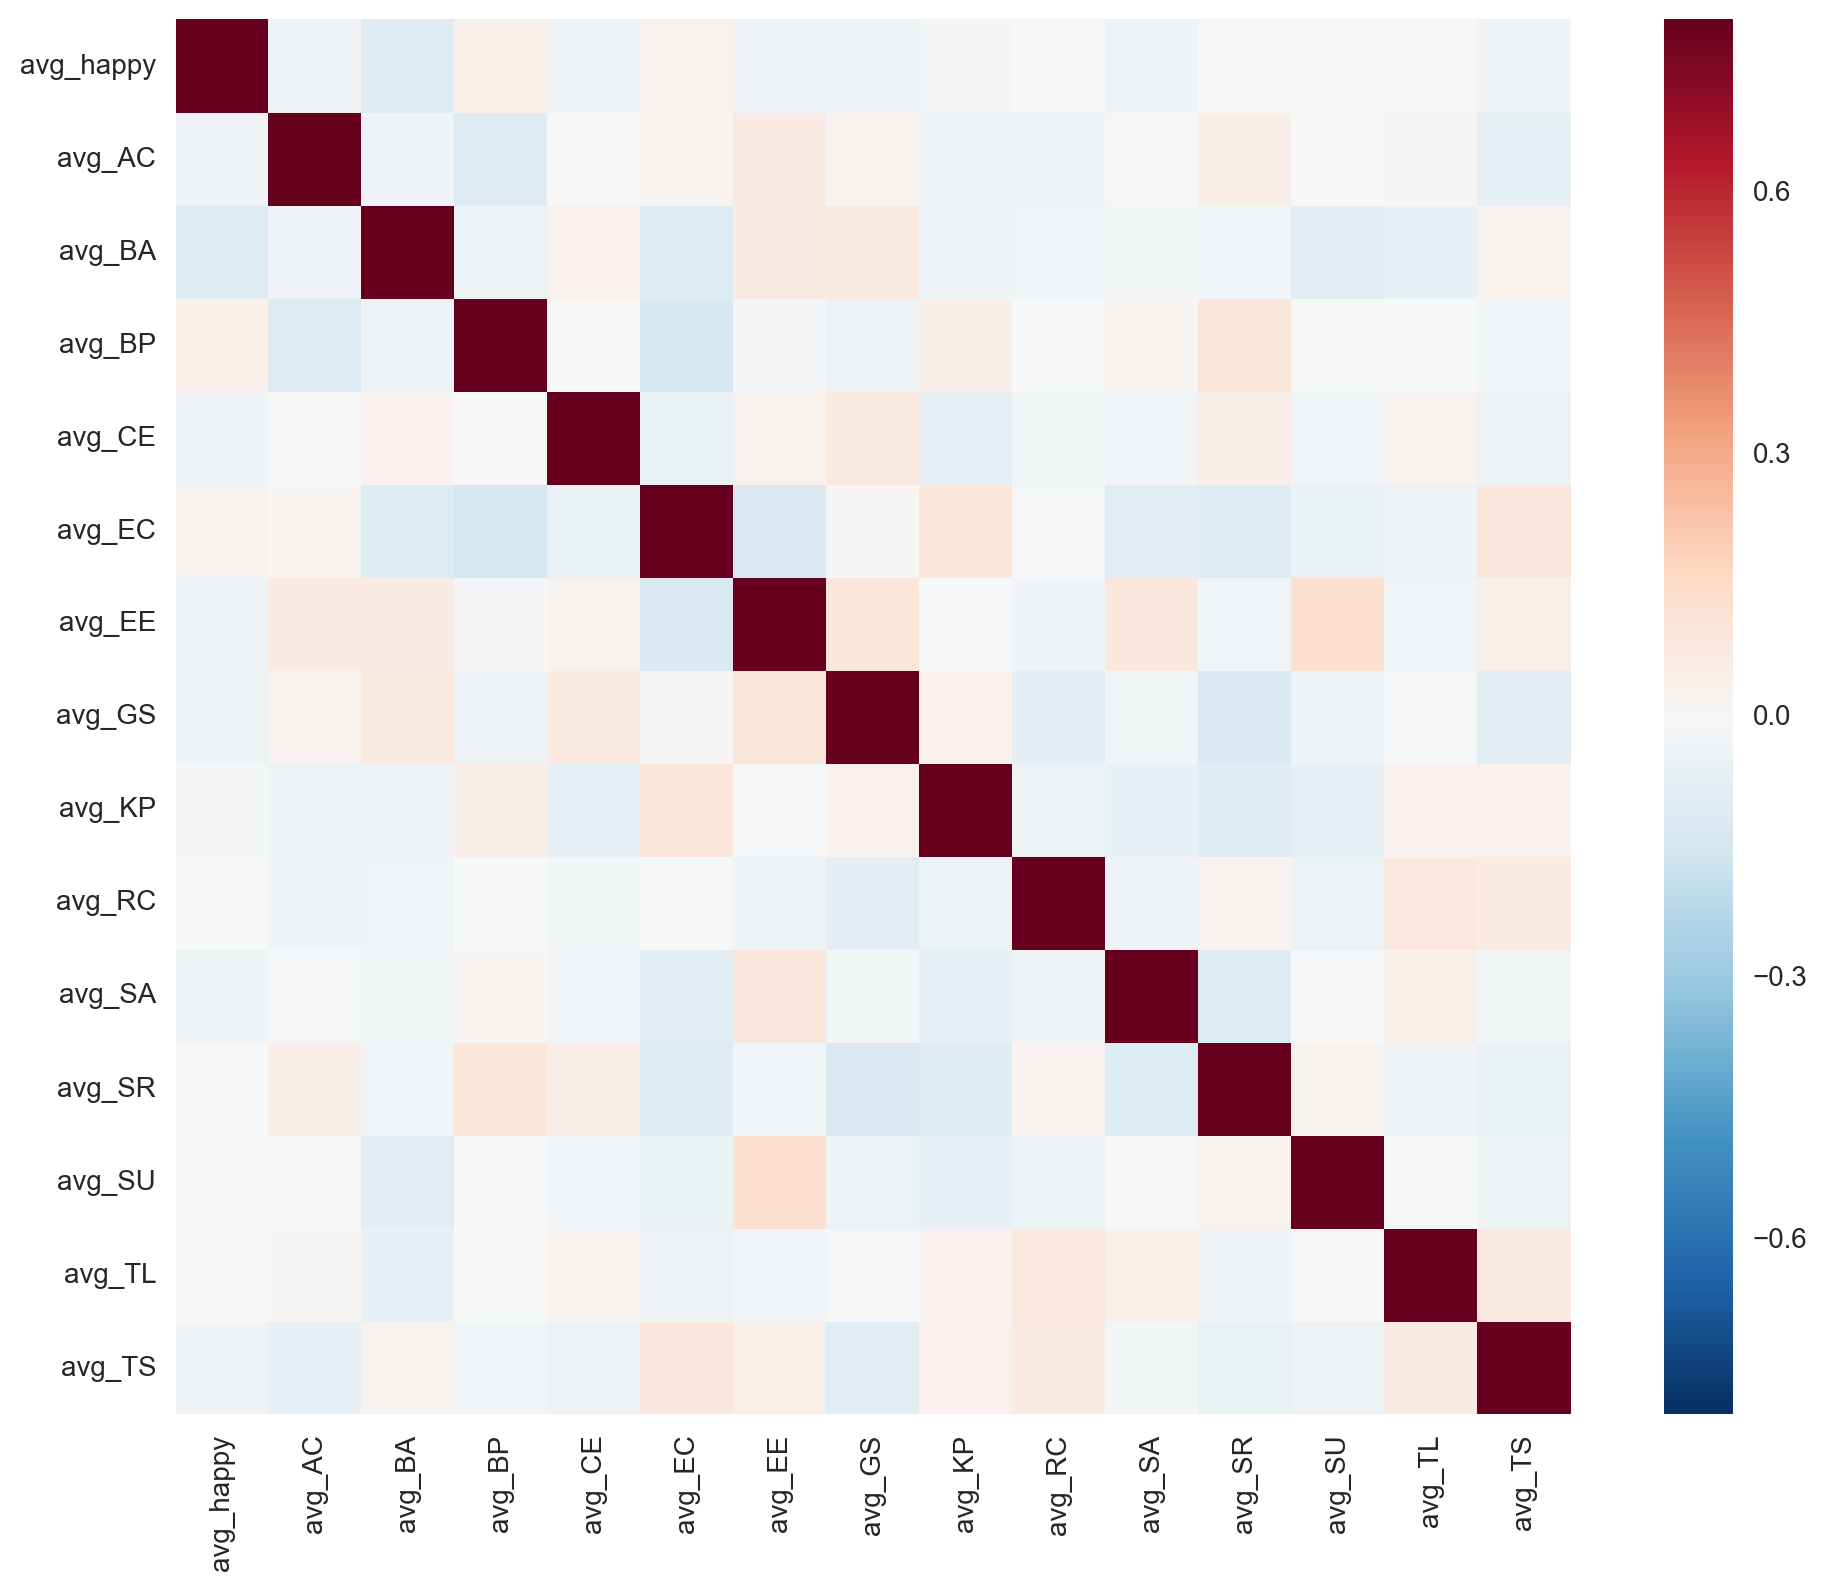

In [24]:
# Heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

From the correlation matrix and the heat map we can see that the there are no strong correlations between the components.

In [25]:
# Define the X, y for modelling
y = final['avg_happy']
X = final[components]

In [26]:
# Import libraries for modelling
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, make_scorer

In [27]:
# Normalise the X before splitting into training and test sets
nn = Normalizer()
Xn = nn.fit_transform(X)

In [28]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.25, random_state=77)

In [29]:
# Let's look at the shape of the new training and test sets
print X_train.shape, X_test.shape

(599, 14) (200, 14)


In [30]:
# Define and fit the Linear Regression model
lr = LinearRegression()

model        =  lr.fit(X_train, y_train)
predictions  =  model.predict(X_test)

/Users/conorhickey/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [31]:
# Print the training and test scores
score = model.score(X_train, y_train)
print 'Train score -', score
score =  model.score(X_test, y_test)
print 'Test score -', score

Train score - 0.0204052048775
Test score - 0.0169570091909


The R2 score for the training set is is 0.02 or 2% of the variance in hapiness can be explained and the R2 score for the training set is is 0.016 or 1.6%.

The model performed worse on the test set than on the training set.

These are very poor accuracy scores and could be an indication that our model is underfitting the data.



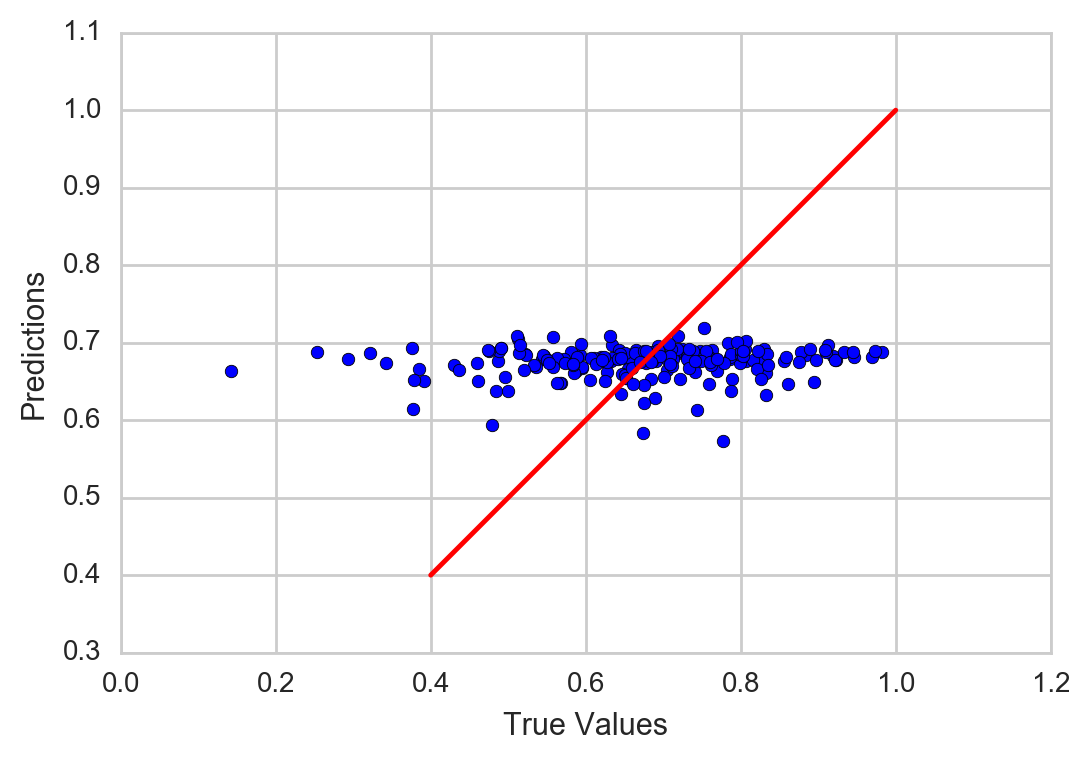

In [32]:
# Scatterplot of the predictions
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([0.4, 1], [0.4, 1], c = 'red')
plt.show()

#### Odds Ratio

By taking the exponential of each of the coefficients we can generate the odds ratios. These tells you how a 1 unit increase or decrease in a variable affects the odds of getting a higher or lower average happiness.

This is a much easier to interept than looking at the coeffecients.

In [33]:
# Create a dataframe to display the odds ratio
odds_ratio = pd.DataFrame(np.transpose(model.coef_), index = X.columns, 
                          columns = ["Coeffecient value"])
# Create the odds colums by calculating the exponential of the coefficients
odds_ratio["Odds"] = odds_ratio["Coeffecient value"].apply(np.exp)
# Display the odds ratio
odds_ratio.sort_values(by = 'Odds', ascending = False)

,Coeffecient value,Odds
avg_SR,0.530329,1.699492
avg_TL,0.519879,1.681825
avg_BP,0.443361,1.557935
avg_TS,0.342810,1.408900
avg_SU,0.330160,1.391190
avg_GS,0.314022,1.368920
avg_RC,0.310284,1.363813
avg_EC,0.305944,1.357906
avg_KP,0.280001,1.323131
avg_SA,0.241384,1.273010


From the odds ratios we can see that see the odds of getting a higher happiness average are highest for the component SR, TL, BP and the component with the odds of getting a lower hapiness is BA.

In [34]:
# Define the coeffecients and creata a dataframe
coefs = pd.Series(model.coef_, index = X.columns)
top_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])

<function matplotlib.pyplot.show>

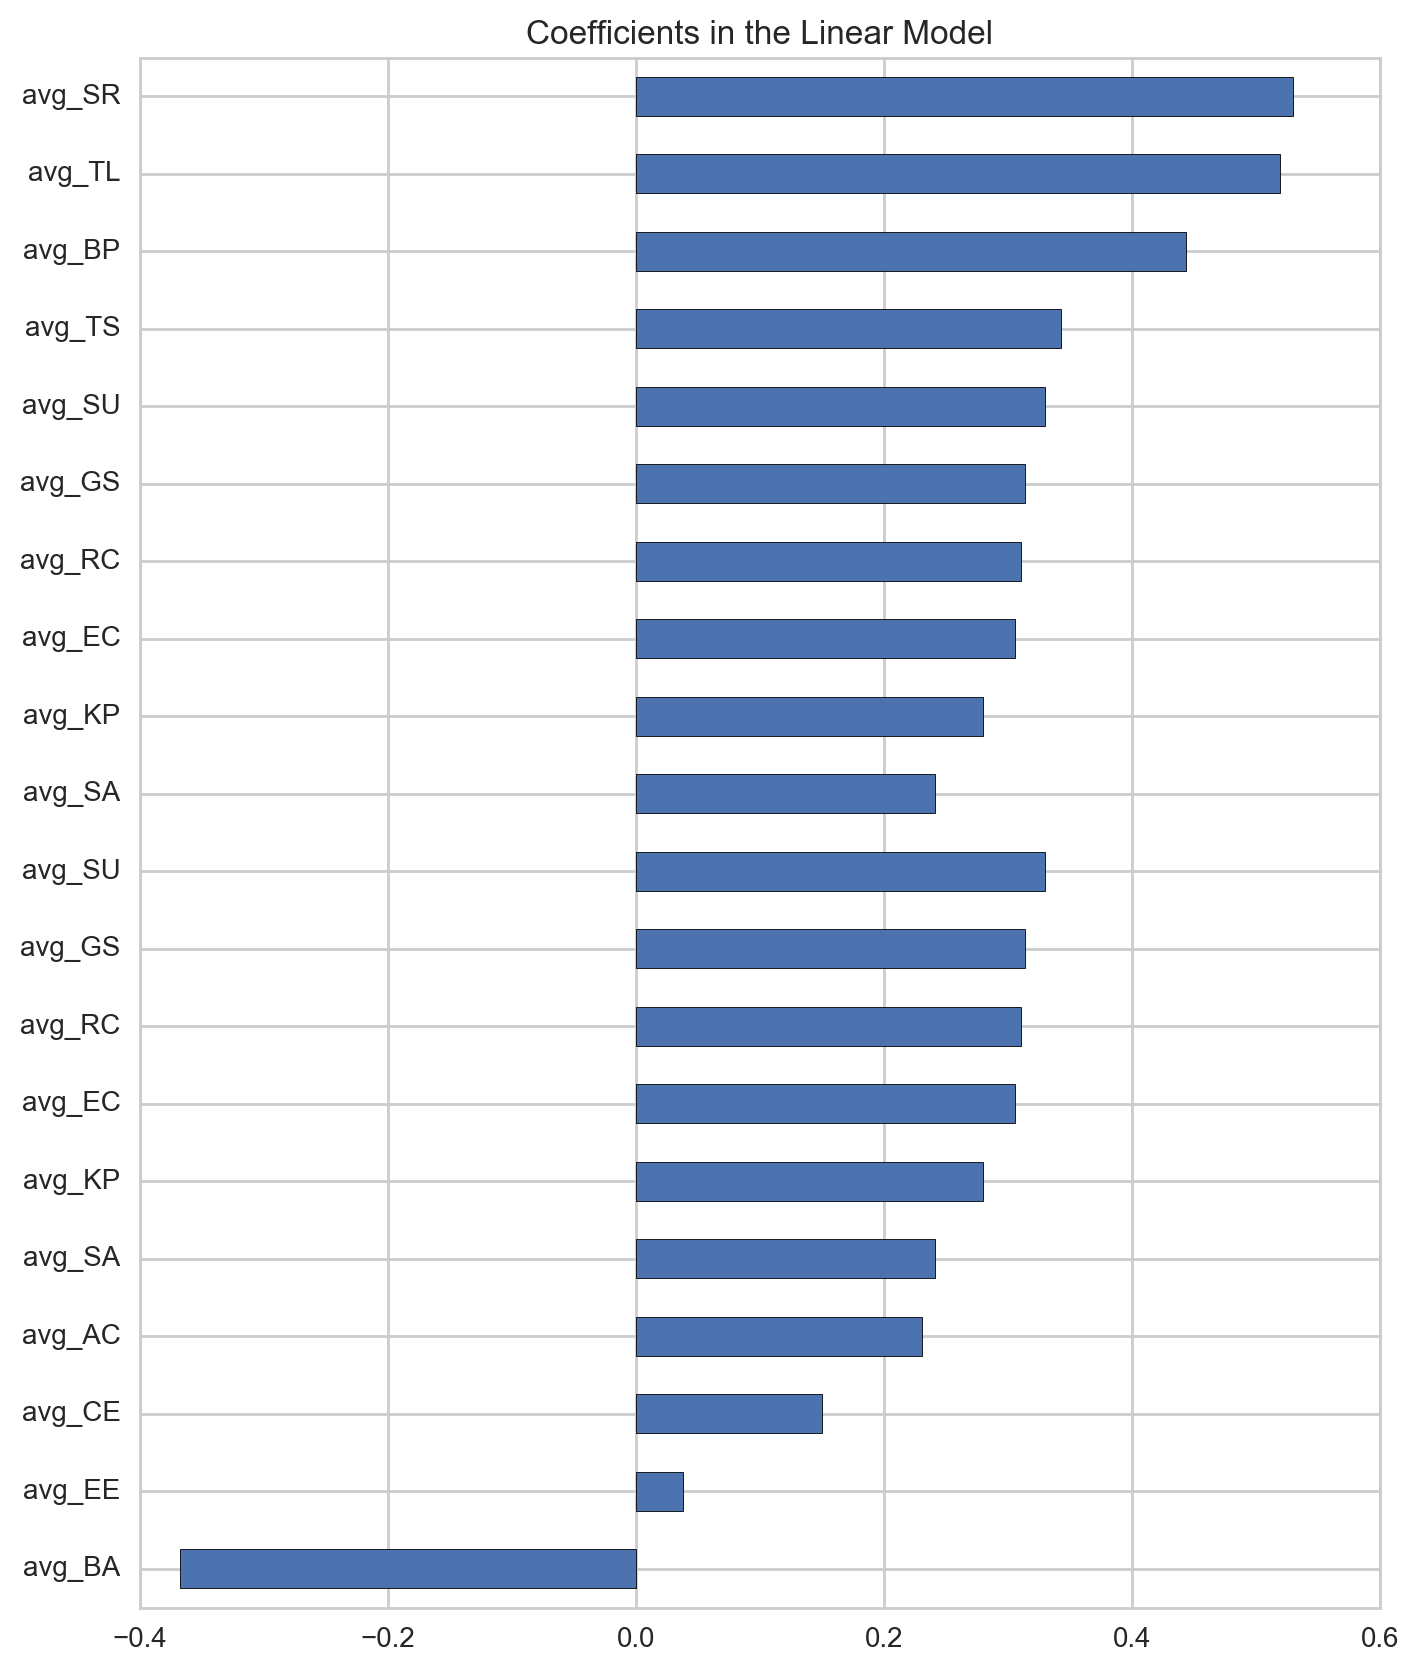

In [35]:
# Plot the coeffecients
plt.rcParams['figure.figsize'] = (8.0, 10.0)
top_coefs.plot(kind = 'barh')
plt.title('Coefficients in the Linear Model')
plt.show

### Summary

---
From the initial analysis and modelling it was found that the model did not perform well at predicting happiness. It was observed that the components SR, TL, BP were the best at predicting a higher happines rating and the component BA the worst.

The accuracy scores were very low indicating that the model was underfitting the data.

Some additional modelling was performed using Lasso and Ridge regularisation but this did not yield any further insights.

To improve upon the model there needs to be a much better understanding of the component's question responses which could have been misinterpreted. A lot of assumptions were made in regards to weighting and the number of responses.

With more information I am confident that the model could be improved upon.